<a href="https://colab.research.google.com/github/shivamkrishna1000/Car-Price-Prediction/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
car=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car.shape

(4340, 8)

In [5]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
car.value_counts('owner')

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [7]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
car.value_counts('fuel')

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [10]:
car.value_counts('seller_type')

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [11]:
car.value_counts('transmission')

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [12]:
car.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
car.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [14]:
x=car.drop(columns=['name','selling_price'],axis=1)
y=car.selling_price

In [15]:
print(x)
print(y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(x)

StandardScaler()

In [18]:
x=scaler.transform(x)
print(x)

[[-1.44507431  0.08113906  0.86482829 -0.5555905  -0.33927557 -0.63031847]
 [-1.44507431 -0.3476891   0.86482829 -0.5555905  -0.33927557 -0.63031847]
 [-0.2587948   0.7243813  -0.95365755 -0.5555905  -0.33927557 -0.63031847]
 ...
 [-0.97056251  0.35987736  0.86482829 -0.5555905  -0.33927557  0.7205863 ]
 [ 0.69022881  0.50996722 -0.95365755 -0.5555905  -0.33927557 -0.63031847]
 [ 0.69022881 -0.56210318  0.86482829 -0.5555905  -0.33927557 -0.63031847]]


In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
model=LinearRegression()

In [21]:
model.fit(xtrain,ytrain)

LinearRegression()

In [22]:
trainpredict=model.predict(xtrain)
score_1=metrics.r2_score(ytrain,trainpredict)
print(score_1)

0.43922410637048936


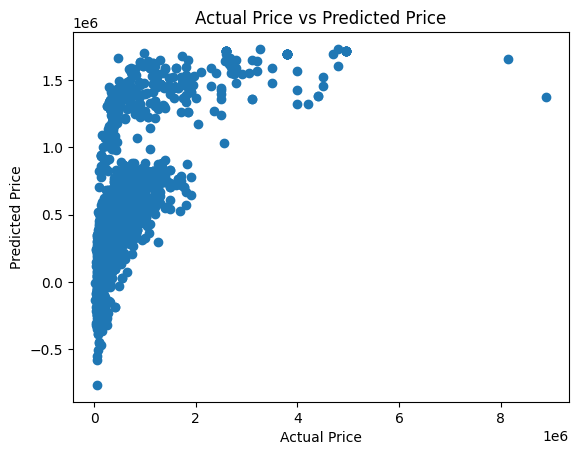

In [23]:
plt.scatter(ytrain,trainpredict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [24]:
testpredict=model.predict(xtest)
score_2=metrics.r2_score(ytest,testpredict)
print(score_2)

0.4998829873054941


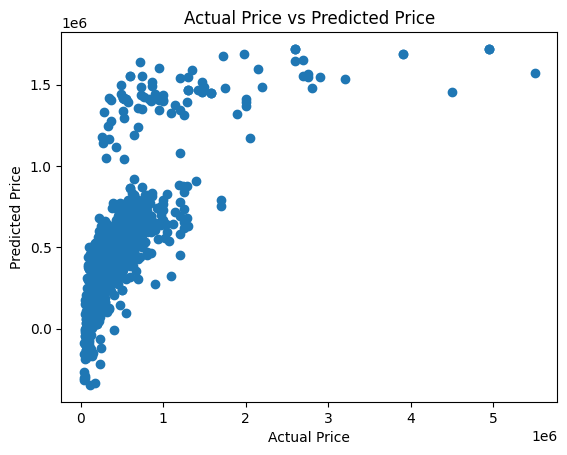

In [25]:
plt.scatter(ytest,testpredict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [26]:
model2=Lasso()

In [27]:
model2.fit(xtrain,ytrain)

Lasso()

In [28]:
trainpredict2=model2.predict(xtrain)
score_3=metrics.r2_score(ytrain,trainpredict2)
print(score_3)

0.4392241063553606


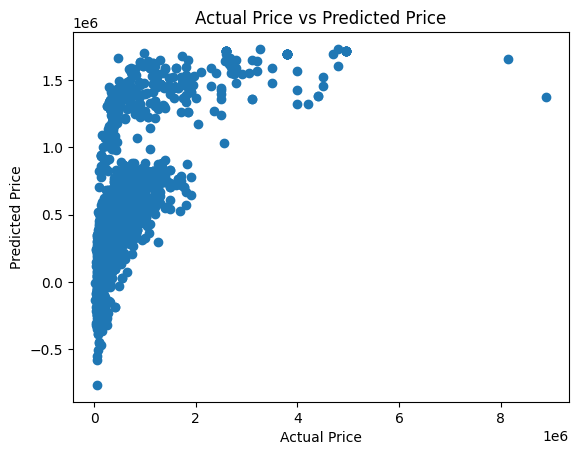

In [29]:
plt.scatter(ytrain,trainpredict2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [30]:
testpredict2=model2.predict(xtest)
score_4=metrics.r2_score(ytest,testpredict2)
print(score_4)

0.4998828523562401


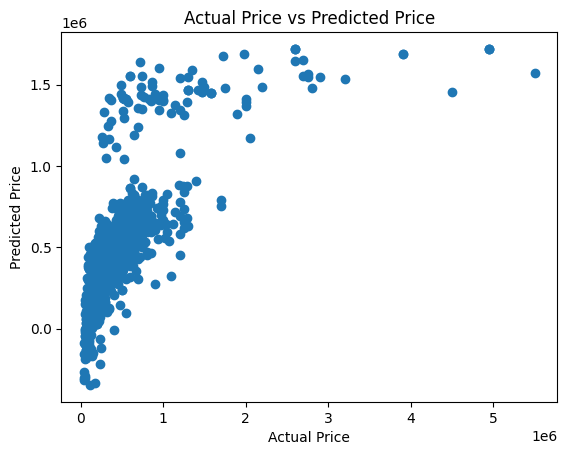

In [31]:
plt.scatter(ytest,testpredict2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [32]:
model3=XGBRegressor()

In [33]:
model3.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
trainpredict3=model3.predict(xtrain)
score_5=metrics.r2_score(ytrain,trainpredict3)
print(score_5)

0.931390627410001


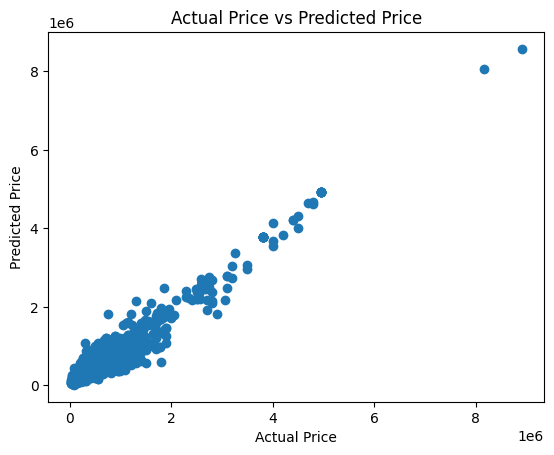

In [35]:
plt.scatter(ytrain,trainpredict3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [36]:
testpredict3=model3.predict(xtest)
score_6=metrics.r2_score(ytest,testpredict3)
print(score_6)

0.7165423122385782


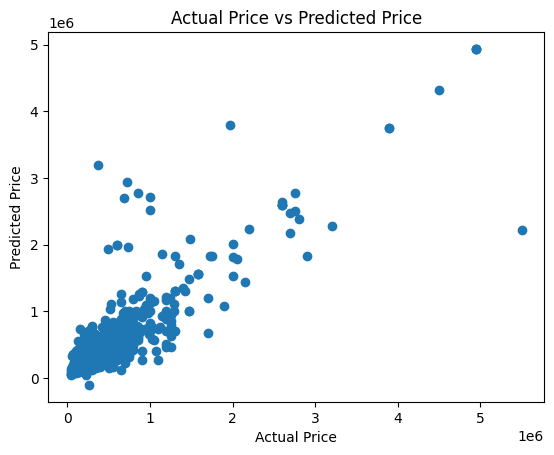

In [37]:
plt.scatter(ytest,testpredict3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()